In [1]:
import numpy as np
import matplotlib.pyplot as plt
from stasis_jax import Simulator

In [2]:
omegas = np.load('/Users/snehpandya/Projects/stasis/paper_plot_data/unsorted_omega/omega_begin_end.npy').reshape(2, 50)
gammas = np.load('/Users/snehpandya/Projects/stasis/paper_plot_data/unsorted_omega/gamma_begin_end.npy').reshape(2, 50)
omega_init = omegas[0]
omega_final = omegas[1]
gamma_init = gammas[0]
gamma_final = gammas[1]

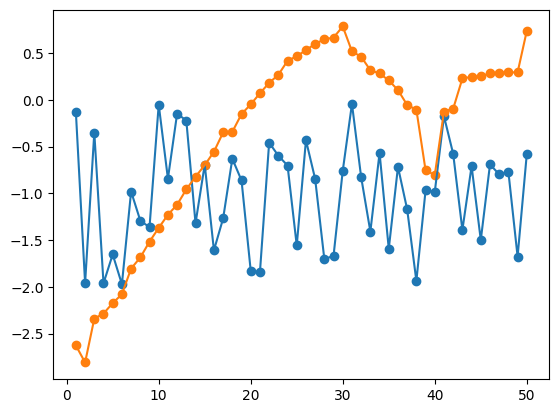

In [3]:
ell = np.linspace(1, 50, 50)
plt.scatter(ell, omega_init, label='Initial')
plt.plot(ell, omega_init, label='Final')
plt.scatter(ell, omega_final, label='Final')
plt.plot(ell, omega_final, label='Final')

/Users/snehpandya/venv-ml/lib/python3.9/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(
/Users/snehpandya/venv-ml/lib/python3.9/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(
/Users/snehpandya/venv-ml/lib/python3.9/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(


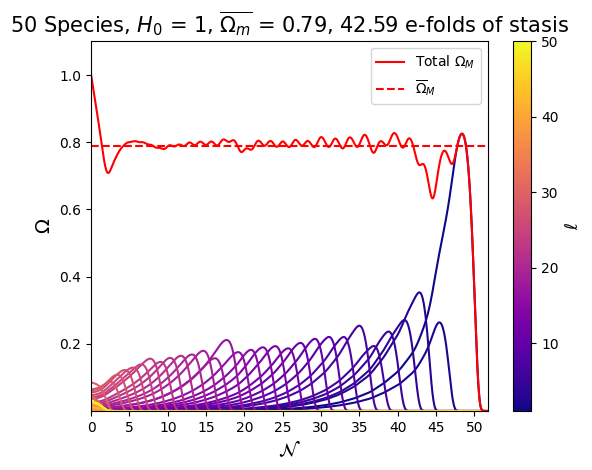

In [4]:
sim = Simulator(Omega_0=10**(omega_final), Gamma_0=10**(gamma_final))
sim.return_stasis()
sim.plot_abundance()
omega_final_norm = sim.Omega_0

/Users/snehpandya/venv-ml/lib/python3.9/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(
/Users/snehpandya/venv-ml/lib/python3.9/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(
/Users/snehpandya/venv-ml/lib/python3.9/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(


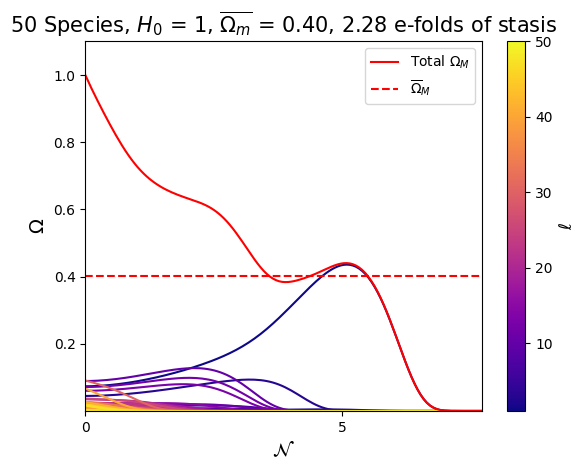

In [5]:
sim = Simulator(Omega_0=10**(omega_init), Gamma_0=10**(gamma_init))
sim.return_stasis()
sim.plot_abundance()
omega_init_norm = sim.Omega_0

/Users/snehpandya/venv-ml/lib/python3.9/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(
/Users/snehpandya/venv-ml/lib/python3.9/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(
/Users/snehpandya/venv-ml/lib/python3.9/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(


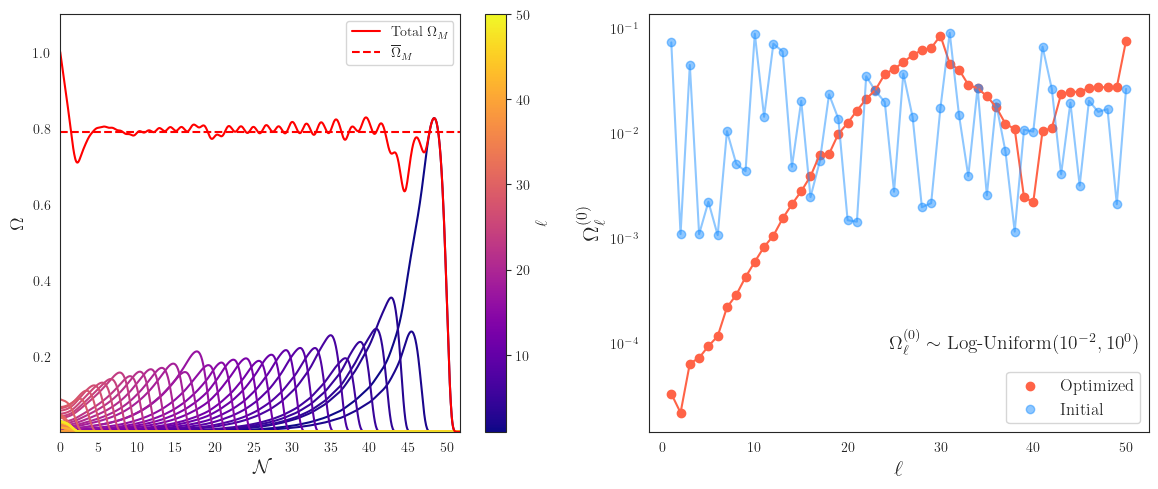

In [7]:
import seaborn as sns
sns.set_style('white')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "text.latex.preamble": r"\usepackage{amsmath}"
})

fig, axs = plt.subplots(1, 2, figsize=(12, 5))

ell = np.linspace(1, 50, 50)
rand_omega = np.random.uniform(-2, 0, 50)

sim = Simulator(Omega_0=10**(omega_final), Gamma_0=10**(gamma_final), H_0=1)
sim.return_stasis()
sim.plot_abundance(ax=axs[0])
## remove axs[0] title
axs[0].set_title('')
axs[1].scatter(ell, omega_final_norm, label = 'Optimized', color = 'tomato')
axs[1].plot(ell, omega_final_norm, color = 'tomato')
axs[1].scatter(ell, omega_init_norm, alpha = 0.5, label = 'Initial', color = 'dodgerblue')
axs[1].plot(ell, omega_init_norm, alpha = 0.5, color = 'dodgerblue')
axs[1].set_xlabel(r'$\ell$', fontsize=16)
axs[1].set_ylabel(r'$\Omega_\ell^{(0)}$', fontsize=16)
axs[1].legend(fontsize=12)
axs[1].set_yscale('log')

#### add text to right plot

axs[1].text(0.48, 0.2, r'$\Omega_\ell^{(0)} \sim \text{Log-Uniform}(10^{-2}, 10^0)$', fontsize=14, transform=axs[1].transAxes)
# axs[1].text(0.48, 0.08, r'$\Gamma_\ell \sim \text{Exponential}(\alpha_\Gamma = -62)$', fontsize=14, transform=axs[1].transAxes)

plt.tight_layout()
plt.savefig('/Users/snehpandya/Projects/stasis/paper_plot_data/unsorted_omega/unsorted_omega_new.png', dpi=300)